In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   5   6   7   9  11  13  15  16  19  20  21  22  23  24  25
  26  28  29  30  32  33  35  36  38  41  42  43  44  45  46  47  51  53
  54  56  57  58  59  60  61  62  63  65  66  67  69  70  72  73  74  77
  78  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  98
  99 100 101 102 104 105 106 107 108 109 110 111 112 114 115 117 119 120
 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 143 144 146 147 148 149 151 152 153 154 155 158 159 160 161 163
 164 165 166 167 168 169 170 171 173 174 176 177 178 179 180 182 183 184
 185 186 187 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207
 208 209 211 212 213 214 216 217 218 219 220 221 223 224 225 226 227 228
 229 232 233 234 237 238 244 245 246 248 254 256 257 259 260 261 262 264
 265 268 269 271 272 273 274 275 276 277 280 281 282 283 284 286 287 288
 289 290 291 292 295 296 297 298 300 303 304 305 307 308 309 311 313 314
 315 316 317 318 319 320 321 322 323 324 325

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 30,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[13:54:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:1.09351	validation_1-merror:0.00000	validation_1-mlogloss:1.09361
[1]	validation_0-merror:0.00000	validation_0-mlogloss:1.08840	validation_1-merror:0.00000	validation_1-mlogloss:1.08861
[2]	validation_0-merror:0.00000	validation_0-mlogloss:1.08342	validation_1-merror:0.00000	validation_1-mlogloss:1.08374
[3]	validation_0-merror:0.00000	validation_0-mlogloss:1.07845	validation_1-merror:0.00000	validation_1-mlogloss:1.07887
[4]	validation_0-merror:0.07820	validation_0-mlogloss:1.07470	validation_1-merror:0.09500	validation_1-mlogloss:1.07528
[5]	validation_0-merror:0.07820	validation_

[64]	validation_0-merror:0.07820	validation_0-mlogloss:0.85321	validation_1-merror:0.09500	validation_1-mlogloss:0.86041
[65]	validation_0-merror:0.07820	validation_0-mlogloss:0.85070	validation_1-merror:0.09500	validation_1-mlogloss:0.85804
[66]	validation_0-merror:0.07820	validation_0-mlogloss:0.84825	validation_1-merror:0.09500	validation_1-mlogloss:0.85571
[67]	validation_0-merror:0.07820	validation_0-mlogloss:0.84500	validation_1-merror:0.09500	validation_1-mlogloss:0.85253
[68]	validation_0-merror:0.07820	validation_0-mlogloss:0.84181	validation_1-merror:0.09500	validation_1-mlogloss:0.84940
[69]	validation_0-merror:0.07820	validation_0-mlogloss:0.83939	validation_1-merror:0.09500	validation_1-mlogloss:0.84710
[70]	validation_0-merror:0.07820	validation_0-mlogloss:0.83620	validation_1-merror:0.09500	validation_1-mlogloss:0.84396
[71]	validation_0-merror:0.07820	validation_0-mlogloss:0.83381	validation_1-merror:0.09500	validation_1-mlogloss:0.84170
[72]	validation_0-merror:0.07820

[132]	validation_0-merror:0.07820	validation_0-mlogloss:0.68228	validation_1-merror:0.09500	validation_1-mlogloss:0.69352
[133]	validation_0-merror:0.07820	validation_0-mlogloss:0.68006	validation_1-merror:0.09500	validation_1-mlogloss:0.69134
[134]	validation_0-merror:0.07820	validation_0-mlogloss:0.67906	validation_1-merror:0.09500	validation_1-mlogloss:0.69044
[135]	validation_0-merror:0.07820	validation_0-mlogloss:0.67732	validation_1-merror:0.09500	validation_1-mlogloss:0.68883
[136]	validation_0-merror:0.07820	validation_0-mlogloss:0.67576	validation_1-merror:0.09500	validation_1-mlogloss:0.68733
[137]	validation_0-merror:0.07820	validation_0-mlogloss:0.67358	validation_1-merror:0.09500	validation_1-mlogloss:0.68519
[138]	validation_0-merror:0.07820	validation_0-mlogloss:0.67198	validation_1-merror:0.09500	validation_1-mlogloss:0.68366
[139]	validation_0-merror:0.07820	validation_0-mlogloss:0.66985	validation_1-merror:0.09500	validation_1-mlogloss:0.68155
[140]	validation_0-merro

[200]	validation_0-merror:0.07820	validation_0-mlogloss:0.57023	validation_1-merror:0.09500	validation_1-mlogloss:0.58413
[201]	validation_0-merror:0.07820	validation_0-mlogloss:0.56867	validation_1-merror:0.09500	validation_1-mlogloss:0.58259
[202]	validation_0-merror:0.07820	validation_0-mlogloss:0.56712	validation_1-merror:0.09500	validation_1-mlogloss:0.58106
[203]	validation_0-merror:0.07820	validation_0-mlogloss:0.56556	validation_1-merror:0.09500	validation_1-mlogloss:0.57951
[204]	validation_0-merror:0.07820	validation_0-mlogloss:0.56446	validation_1-merror:0.09500	validation_1-mlogloss:0.57847
[205]	validation_0-merror:0.07820	validation_0-mlogloss:0.56294	validation_1-merror:0.09500	validation_1-mlogloss:0.57696
[206]	validation_0-merror:0.07820	validation_0-mlogloss:0.56139	validation_1-merror:0.09500	validation_1-mlogloss:0.57544
[207]	validation_0-merror:0.07820	validation_0-mlogloss:0.55988	validation_1-merror:0.09500	validation_1-mlogloss:0.57394
[208]	validation_0-merro

[267]	validation_0-merror:0.07820	validation_0-mlogloss:0.49144	validation_1-merror:0.09500	validation_1-mlogloss:0.50688
[268]	validation_0-merror:0.07820	validation_0-mlogloss:0.49031	validation_1-merror:0.09500	validation_1-mlogloss:0.50576
[269]	validation_0-merror:0.07820	validation_0-mlogloss:0.48918	validation_1-merror:0.09500	validation_1-mlogloss:0.50464
[270]	validation_0-merror:0.07820	validation_0-mlogloss:0.48842	validation_1-merror:0.09500	validation_1-mlogloss:0.50390
[271]	validation_0-merror:0.07820	validation_0-mlogloss:0.48725	validation_1-merror:0.09500	validation_1-mlogloss:0.50274
[272]	validation_0-merror:0.07820	validation_0-mlogloss:0.48611	validation_1-merror:0.09500	validation_1-mlogloss:0.50160
[273]	validation_0-merror:0.07820	validation_0-mlogloss:0.48501	validation_1-merror:0.09500	validation_1-mlogloss:0.50051
[274]	validation_0-merror:0.07820	validation_0-mlogloss:0.48387	validation_1-merror:0.09500	validation_1-mlogloss:0.49938
[275]	validation_0-merro

[335]	validation_0-merror:0.07820	validation_0-mlogloss:0.43159	validation_1-merror:0.09500	validation_1-mlogloss:0.44787
[336]	validation_0-merror:0.07654	validation_0-mlogloss:0.43074	validation_1-merror:0.09500	validation_1-mlogloss:0.44702
[337]	validation_0-merror:0.07654	validation_0-mlogloss:0.42986	validation_1-merror:0.09500	validation_1-mlogloss:0.44615
[338]	validation_0-merror:0.07654	validation_0-mlogloss:0.42900	validation_1-merror:0.09500	validation_1-mlogloss:0.44530
[339]	validation_0-merror:0.07654	validation_0-mlogloss:0.42815	validation_1-merror:0.09500	validation_1-mlogloss:0.44444
[340]	validation_0-merror:0.07654	validation_0-mlogloss:0.42768	validation_1-merror:0.09500	validation_1-mlogloss:0.44400
[341]	validation_0-merror:0.07654	validation_0-mlogloss:0.42684	validation_1-merror:0.09500	validation_1-mlogloss:0.44317
[342]	validation_0-merror:0.07654	validation_0-mlogloss:0.42630	validation_1-merror:0.09500	validation_1-mlogloss:0.44265
[343]	validation_0-merro

[403]	validation_0-merror:0.06988	validation_0-mlogloss:0.39151	validation_1-merror:0.08500	validation_1-mlogloss:0.40809
[404]	validation_0-merror:0.06822	validation_0-mlogloss:0.39083	validation_1-merror:0.08500	validation_1-mlogloss:0.40742
[405]	validation_0-merror:0.06988	validation_0-mlogloss:0.39048	validation_1-merror:0.08500	validation_1-mlogloss:0.40708
[406]	validation_0-merror:0.06988	validation_0-mlogloss:0.39011	validation_1-merror:0.08500	validation_1-mlogloss:0.40673
[407]	validation_0-merror:0.06822	validation_0-mlogloss:0.38943	validation_1-merror:0.08500	validation_1-mlogloss:0.40605
[408]	validation_0-merror:0.06822	validation_0-mlogloss:0.38878	validation_1-merror:0.08500	validation_1-mlogloss:0.40540
[409]	validation_0-merror:0.06822	validation_0-mlogloss:0.38845	validation_1-merror:0.08500	validation_1-mlogloss:0.40506
[410]	validation_0-merror:0.06822	validation_0-mlogloss:0.38811	validation_1-merror:0.08500	validation_1-mlogloss:0.40473
[411]	validation_0-merro

[471]	validation_0-merror:0.03827	validation_0-mlogloss:0.36159	validation_1-merror:0.05500	validation_1-mlogloss:0.37831
[472]	validation_0-merror:0.03827	validation_0-mlogloss:0.36131	validation_1-merror:0.05500	validation_1-mlogloss:0.37804
[473]	validation_0-merror:0.03827	validation_0-mlogloss:0.36101	validation_1-merror:0.05500	validation_1-mlogloss:0.37776
[474]	validation_0-merror:0.03827	validation_0-mlogloss:0.36050	validation_1-merror:0.05000	validation_1-mlogloss:0.37724
[475]	validation_0-merror:0.03827	validation_0-mlogloss:0.36021	validation_1-merror:0.05000	validation_1-mlogloss:0.37697
[476]	validation_0-merror:0.03827	validation_0-mlogloss:0.35967	validation_1-merror:0.05000	validation_1-mlogloss:0.37643
[477]	validation_0-merror:0.03827	validation_0-mlogloss:0.35965	validation_1-merror:0.05000	validation_1-mlogloss:0.37641
[478]	validation_0-merror:0.03827	validation_0-mlogloss:0.35916	validation_1-merror:0.05000	validation_1-mlogloss:0.37592
[479]	validation_0-merro

[539]	validation_0-merror:0.03161	validation_0-mlogloss:0.33801	validation_1-merror:0.04500	validation_1-mlogloss:0.35472
[540]	validation_0-merror:0.03161	validation_0-mlogloss:0.33757	validation_1-merror:0.04500	validation_1-mlogloss:0.35428
[541]	validation_0-merror:0.03161	validation_0-mlogloss:0.33716	validation_1-merror:0.04500	validation_1-mlogloss:0.35387
[542]	validation_0-merror:0.03161	validation_0-mlogloss:0.33694	validation_1-merror:0.04500	validation_1-mlogloss:0.35366
[543]	validation_0-merror:0.03161	validation_0-mlogloss:0.33672	validation_1-merror:0.04500	validation_1-mlogloss:0.35345
[544]	validation_0-merror:0.03161	validation_0-mlogloss:0.33631	validation_1-merror:0.04500	validation_1-mlogloss:0.35304
[545]	validation_0-merror:0.03161	validation_0-mlogloss:0.33630	validation_1-merror:0.04500	validation_1-mlogloss:0.35303
[546]	validation_0-merror:0.03161	validation_0-mlogloss:0.33610	validation_1-merror:0.04500	validation_1-mlogloss:0.35282
[547]	validation_0-merro

[607]	validation_0-merror:0.02995	validation_0-mlogloss:0.31987	validation_1-merror:0.04000	validation_1-mlogloss:0.33663
[608]	validation_0-merror:0.02995	validation_0-mlogloss:0.31967	validation_1-merror:0.04000	validation_1-mlogloss:0.33644
[609]	validation_0-merror:0.02995	validation_0-mlogloss:0.31931	validation_1-merror:0.04000	validation_1-mlogloss:0.33608
[610]	validation_0-merror:0.02995	validation_0-mlogloss:0.31912	validation_1-merror:0.04000	validation_1-mlogloss:0.33589
[611]	validation_0-merror:0.02995	validation_0-mlogloss:0.31892	validation_1-merror:0.04000	validation_1-mlogloss:0.33571
[612]	validation_0-merror:0.02995	validation_0-mlogloss:0.31874	validation_1-merror:0.04000	validation_1-mlogloss:0.33554
[613]	validation_0-merror:0.02995	validation_0-mlogloss:0.31856	validation_1-merror:0.04000	validation_1-mlogloss:0.33537
[614]	validation_0-merror:0.02995	validation_0-mlogloss:0.31837	validation_1-merror:0.04000	validation_1-mlogloss:0.33519
[615]	validation_0-merro

[675]	validation_0-merror:0.01664	validation_0-mlogloss:0.30895	validation_1-merror:0.03500	validation_1-mlogloss:0.32609
[676]	validation_0-merror:0.01664	validation_0-mlogloss:0.30879	validation_1-merror:0.03500	validation_1-mlogloss:0.32594
[677]	validation_0-merror:0.01664	validation_0-mlogloss:0.30879	validation_1-merror:0.03500	validation_1-mlogloss:0.32594
[678]	validation_0-merror:0.01664	validation_0-mlogloss:0.30862	validation_1-merror:0.03500	validation_1-mlogloss:0.32579
[679]	validation_0-merror:0.01664	validation_0-mlogloss:0.30862	validation_1-merror:0.03500	validation_1-mlogloss:0.32579
[680]	validation_0-merror:0.01664	validation_0-mlogloss:0.30862	validation_1-merror:0.03500	validation_1-mlogloss:0.32579
[681]	validation_0-merror:0.01664	validation_0-mlogloss:0.30862	validation_1-merror:0.03500	validation_1-mlogloss:0.32579
[682]	validation_0-merror:0.01664	validation_0-mlogloss:0.30846	validation_1-merror:0.03500	validation_1-mlogloss:0.32562
[683]	validation_0-merro

[743]	validation_0-merror:0.00000	validation_0-mlogloss:0.30359	validation_1-merror:0.00000	validation_1-mlogloss:0.32086
[744]	validation_0-merror:0.00000	validation_0-mlogloss:0.30343	validation_1-merror:0.00000	validation_1-mlogloss:0.32071
[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.30327	validation_1-merror:0.00000	validation_1-mlogloss:0.32056
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.30327	validation_1-merror:0.00000	validation_1-mlogloss:0.32056
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.30327	validation_1-merror:0.00000	validation_1-mlogloss:0.32056
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.30326	validation_1-merror:0.00000	validation_1-mlogloss:0.32055
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.30311	validation_1-merror:0.00000	validation_1-mlogloss:0.32041
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.30311	validation_1-merror:0.00000	validation_1-mlogloss:0.32041
[751]	validation_0-merro

[811]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[812]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.30051	validation_1-merror:0.00000	validation_1-mlogloss:0.31790
[819]	validation_0-merro

[879]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[880]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.29929	validation_1-merror:0.00000	validation_1-mlogloss:0.31666
[887]	validation_0-merro

[947]	validation_0-merror:0.00000	validation_0-mlogloss:0.29857	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[948]	validation_0-merror:0.00000	validation_0-mlogloss:0.29857	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.29857	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.29857	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.29856	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[952]	validation_0-merror:0.00000	validation_0-mlogloss:0.29856	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[953]	validation_0-merror:0.00000	validation_0-mlogloss:0.29856	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[954]	validation_0-merror:0.00000	validation_0-mlogloss:0.29856	validation_1-merror:0.00000	validation_1-mlogloss:0.31592
[955]	validation_0-merro

In [7]:
y_pred.shape

(200,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    94
1.0    87
2.0    19
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    107
1.0     93
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 90.02%
LR Accuracy: 87.00%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             25.91%
Feature Importance: HTGDIFF                             23.7%
Feature Importance: awayTeamScore.minutesInFront        16.68%
Feature Importance: homeTeamScore.minutesInFront        11.26%
Feature Importance: awayTeamScoreChart.goals            6.69%
Feature Importance: awayTeamScore.matchScore.totalScore 6.21%
Feature Importance: homeTeamScore.matchScore.totalScore 5.02%
Feature Importance: homeTeamScoreChart.goals            4.53%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['homeTeamScore.matchScore.totalScore',
 'homeTeamScoreChart.goals',
 'AVGHTGDIFF',
 'round.year']

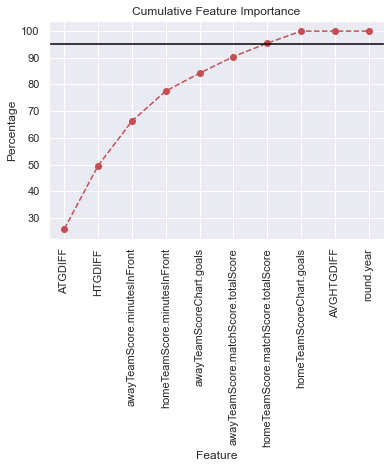

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

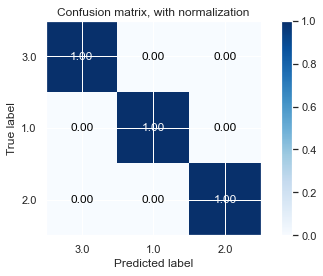

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


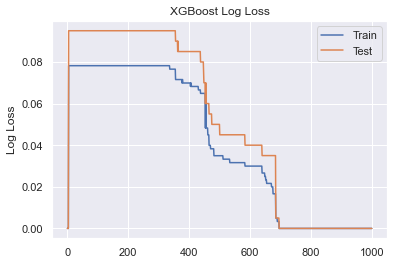

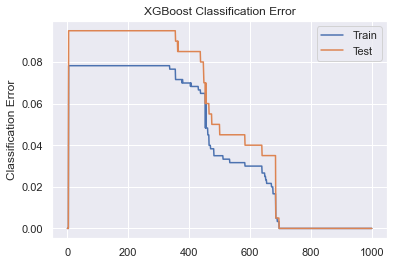

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
18,Western Bulldogs,Sydney Swans,3.0
19,Melbourne,Essendon,3.0
20,Adelaide Crows,Port Adelaide,3.0
21,GWS Giants,Gold Coast Suns,1.0
22,Collingwood,Geelong Cats,3.0
23,Brisbane Lions,North Melbourne,1.0
24,Carlton,Hawthorn,3.0
25,St Kilda,Richmond,3.0
26,West Coast Eagles,Fremantle,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
18,Western Bulldogs,Sydney Swans,3.0,0.084115,0.102201,0.813684
19,Melbourne,Essendon,3.0,0.249393,0.157210,0.593397
20,Adelaide Crows,Port Adelaide,3.0,0.084115,0.102201,0.813684
21,GWS Giants,Gold Coast Suns,1.0,0.753237,0.130455,0.116308
22,Collingwood,Geelong Cats,3.0,0.084115,0.102201,0.813684
23,Brisbane Lions,North Melbourne,1.0,0.728722,0.137647,0.133631
24,Carlton,Hawthorn,3.0,0.084115,0.102201,0.813684
25,St Kilda,Richmond,3.0,0.084115,0.102201,0.813684
26,West Coast Eagles,Fremantle,1.0,0.753237,0.130455,0.116308
